# Sensor Data #

### Setup ###

In [1]:
# Import libraries
import numpy as np
import json as json
import pandas as pd
import math
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import pylab as pl 
from zoneinfo import ZoneInfo
import imp

In [2]:
# Set options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
#this seems to fix the odd scrolling behavior when charts are present
%matplotlib inline 

In [3]:
# Use dark Background
pl.style.use('dark_background')

### Functions ###

In [6]:
imp.load_source('libs', '/home/mauro/sqrpi/lib/libs.py')
import libs as lb

### Load Settings ###

In [7]:
config=json.loads(open('settings.json','r').read())

In [8]:
window = config['window'] # length of observation frame (in secs)
sample_rate = config['sample_rate'] # Hz
offset_x = config['offset_x']
offset_y = config['offset_y']
offset_z = config['offset_z'] # run calibrate.py to update this value, with sensor board resting as horizontal as possible
ipmux_addr = config['ipmux_addr']  # destination of NMEA UDP messages 
ipmux_port = config['ipmux_port'] 
pitch_on_y_axis = config['pitch_on_y_axis'] # Rpi oriented with longest side parallel to fore-aft line of vessel (0) or perpendicular (1)

sample_period = 1.0/sample_rate
n = int(window*sample_rate) 
df = float(sample_rate)/float(n)

## Debugging ##

Read the arrays from saved files

In [24]:
npydir = 'npyfiles/fieldtests/'
run = '2025_09_10_17_14' # manual simulation of about 1 mt oscillations

In [25]:
freqs    = np.load(f'{npydir}freqs_{run}.npy')
signal   = np.load(f'{npydir}signal_{run}.npy')
amp_spec = np.load(f'{npydir}amp_spec_{run}.npy')
heights  = np.load(f'{npydir}heights_{run}.npy')
print('signal: ', len(signal), 'amp_spec: ', len(amp_spec))

signal:  720 amp_spec:  38


In [ ]:
#signal = np.load(f'{npydir}signal_corr.npy')

In [26]:
w=40
mavg_signal = lb.moving_average(signal,w)
ls =  len(signal)
print(len(signal),len(mavg_signal))

720 681


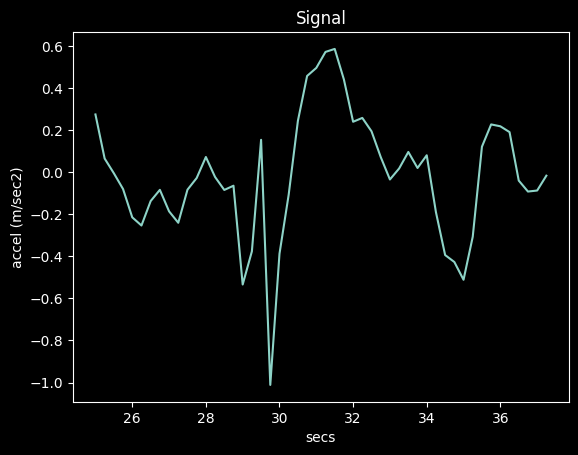

In [27]:
fr=100
#fr = 0
to=150 
#to = ls
pl.title('Signal')
pl.xlabel('secs')
pl.ylabel('accel (m/sec2)')
# moving average
#pl.plot([float(i)/float(sample_rate) for i in range(int(w/2)-1, ls-int(w/2) )],mavg_signal)
# raw signal
pl.plot([float(i)/float(sample_rate) for i in range(fr,to)],signal[fr:to] )
pl.show( )

In [28]:
# subtract moving average
signal_corr = np.concatenate([signal[:w-1], signal[w-1:]-mavg_signal] )

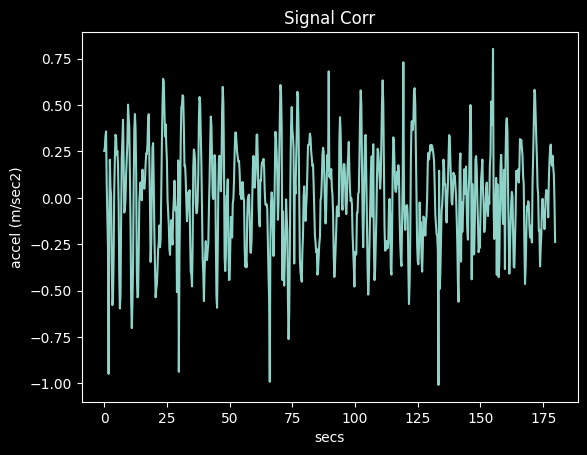

In [29]:
pl.title('Signal Corr')
pl.xlabel('secs')
pl.ylabel('accel (m/sec2)')
pl.plot([float(i)/float(sample_rate) for i in range(0,ls)],signal_corr[0:ls])
pl.show()

In [18]:
np.save(f'{npydir}signal_corr', signal_corr)

Acceleration and Dominant Period

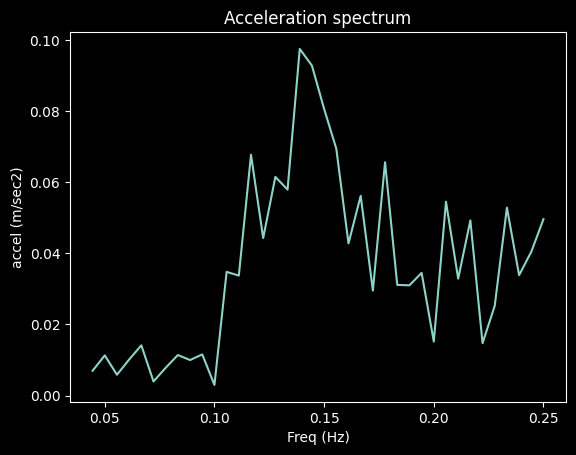

In [19]:
pl.title('Acceleration spectrum')
pl.xlabel('Freq (Hz)')
pl.ylabel('accel (m/sec2)')
pl.plot(freqs, amp_spec)
pl.show()

Identify dominant period using mobile average

In [20]:
w=4
mavg = lb.moving_average(amp_spec, w)
max_index = np.argmax(mavg)+int(w/2)
print('len amp_spec', len(amp_spec), 'len mavg' , len(mavg), 'max index', max_index)

len amp_spec 38 len mavg 35 max index 19


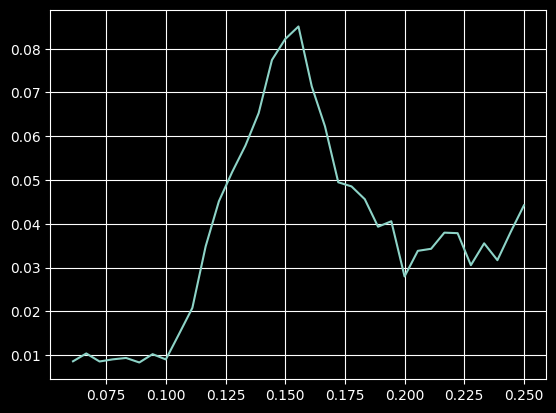

In [21]:
mavg = pl.plot(freqs[3:], mavg)
pl.grid(True)

Dominant period using acceleration

In [22]:
dom_freq = freqs[max_index]
dom_per = 1/dom_freq
dom_per

6.666666666666667

Heave

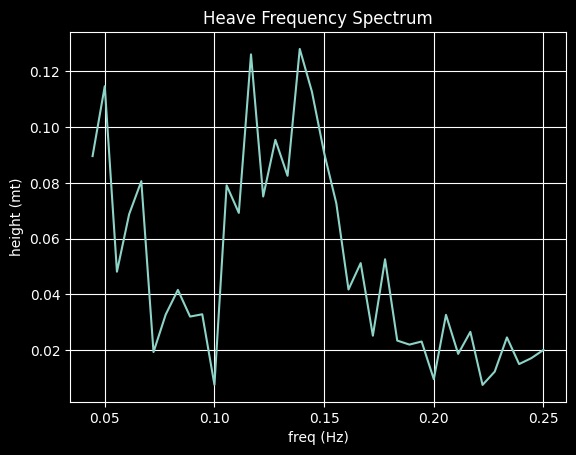

In [23]:
pl.title('Heave Frequency Spectrum')
pl.xlabel('freq (Hz)')
pl.ylabel('height (mt)')
pl.plot(freqs, heights)
pl.grid(True)
pl.show()

Power spectral density

In [ ]:
psd = (heights**2)/freqs
pl.plot(freqs, psd )

Dominant Period using PSD

In [ ]:
max_index = np.argmax(psd)
print('max_index', max_index, "Dominant period using Power Spectral Density", 1/freqs[max_index])

Significant Wave Height

In [ ]:
m0  = sum(psd*df)
sig_wave_height = 4 * math.sqrt(m0) 
print("significant wave height", sig_wave_height)

Average wave period

In [ ]:
f2=freqs**2

In [ ]:
psd

In [ ]:
df

In [ ]:
m0

In [ ]:
m2=sum(np.multiply(psd,f2)*df)
m2

In [ ]:
m0/m2

In [ ]:
math.sqrt(m0/m2)

Amplitude Spectral Density

In [ ]:
asd = np.sqrt(psd)

In [ ]:
m0  = sum(asd*df)
sig_wave_height = 4 * math.sqrt(m0) 
sig_wave_height

#### calculate SWH from time series ####

this makes no sense as it is calculated on acceleration, not displacement

In [ ]:
m0 = np.var(signal)

In [ ]:
sig_wave_height = 4 * math.sqrt(m0) 
sig_wave_height